# Practical Work № 5: Predicting the risk of heart disease in patients
## Authors:
|Name|Surname|Student ID|E-mail|
|---|---|---|---|
|Kamal|Ahmadov|22022692|kamal.ahmadov1@ufaz.az|   
|Murad|Mustafayev|22022733 |murad.mustafayev@ufaz.az|

# 1. Objective & Dataset
Within the framework of this practical work, we have to train models on the “Cleveland Heart Disease” dataset in order to **predict the risk of heart disease in patients**. This dataset contains 303 instances and each instance is described by 14 attributes. Each of these attributes are phylosiological measurements. Let's first load the dataset:

In [180]:
# necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
heart_data = pd.read_csv('heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Let's overview the dataset and its attributes:

|Attribute|Description|
|---|---|
|age|The person’s age in years|  
|sex|The person’s sex (1 = male, 0 = female)|
|chest pain type| The chest pain experienced (Value 1 : typical angina, Value 2 : atypical angina, Value 3 : non-anginal pain, Value 4 : asymptomatic)
|resting blood pressure|The person’s resting blood pressure (mm Hg on admission to the hospital)|
|cholesterol|The person’s cholesterol measurement in mg/dl|
|fasting blood sugar|The person’s fasting blood sugar (> 120 mg/dl, 1 = true ; 0 = false)|
|rest ecg|Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes’ criteria)
|max hear rate achieved|The person’s maximum heart rate achieved|
|exercise induced angina|Exercise induced angina (1 = yes; 0 = no)|
|st depression|ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot|
|st slope| the slope of the peak exercise ST segment (Value 1 : upsloping, Value 2 : flat, Value 3 : downsloping)|
|num major blood vessels| The number of major vessels (0-3)|
|thalassemia|A blood disorder called thalassemia (3 = normal ; 6 = fixed defect ; 7 = reversable defect)|
|target|Diagnosis of a heart disease (0 = no, 1 = yes)|

## Questions related to the table above:
1. What is the name of the attribute we want to predict?<br>**Answer:** The attribute we want to predict is named "target," which represents the diagnosis of heart disease (0 = no, 1 = yes).
2. Is that a binary or a multi-class classification?<br>**Answer:** It is a binary classification problem since the target variable has two classes: 0 (no heart disease) and 1 (heart disease).
3. What are the types of the attributes?<br>**Answer:** The types of the attributes are both numerical and categorical.The categorical attributes in the dataset are:
- Sex
- Chest pain type
- Fasting blood sugar
- Rest ECG
- Exercise induced angina
- ST slope
- Thalassemia
4. How can we encode categorical attributes?<br>**Answer:** Categorical attributes can be encoded using techniques such as one-hot encoding or label encoding:
- *One-hot encoding:* This technique creates binary columns for each category and represents the presence or absence of a category with a 1 or 0, respectively.
- *Label encoding:* This technique assigns a unique integer to each category. However, it should be noted that label encoding may not be suitable for attributes where the categories do not have an ordinal relationship.

## Questions on attribute normalization:
1. Which normalization method will be best adapted so we can preserve the variance of the dataset?<br>**Answer:** The Z-score normalization function, also known as standardization, is best adapted to preserve the variance of the dataset. In Z-score normalization, each feature is scaled to have a mean of 0 and a standard deviation of 1. This method preserves the shape of the distribution and ensures that each feature has the same scale, which is important for many machine learning algorithms.
2. Will you normalize the data before or after splitting the dataset in training/testing datasets?<br>**Answer:** It's generally recommended to normalize the data after splitting the dataset into training and testing sets. This helps prevent data leakage from the testing set into the training set, which could lead to overly optimistic evaluation metrics. Normalizing the data after splitting ensures that each set (training and testing) is normalized independently based on its own statistics.
3. Implement a method/function to normalize the attribute using the adequate normalization method.

In [182]:
def z_score_normalization(data):
    """
    Normalize the attributes using Z-score normalization (standardization).

    Parameters:
    data (pandas.DataFrame): Input data with columns representing attributes.

    Returns:
    pandas.DataFrame: Normalized data.
    """
    
    # X_normalized = (X - X.mean(axis=0)) / X.std(axis=0), this logic 
    
    # calculate the mean of each column
    mean = data.mean(axis=0)
    
    # calculate the standard deviation of each column
    std = data.std(axis=0)
    
    # standardize the data
    data_normalized = (data - mean) / std
    
    return data_normalized

# 2. Predictions using a Multi-layer perceptron (MLP)
As a first step, we will use MLP with 1 hidden layer containing 5 units.

Questions:
1. What are the dimensions of the matrices you will use to represent your model (inputs, parameters and outputs) ? How will you integrate the concept of mini-batch training?<br>**Answer:** For an MLP with 1 hidden layer containing 5 units, let's break down the dimensions of the matrices:
- Inputs: The input matrix would have dimensions (`batch_size`, `input_features`), where `batch_size` represents the number of samples in each mini-batch and `input_features` represents the number of features in each sample.
- Parameters: 
    - Weights between input layer and hidden layer: This matrix would have dimensions (`input_features`, `num_hidden_units`), where `num_hidden_units` is the number of units in the hidden layer.
    - Biases for the hidden layer: This vector would have dimensions (`num_hidden_units`).
    - Weights between hidden layer and output layer: This matrix would have dimensions (`num_hidden_units`, `num_classes`), where `num_classes` is the number of output classes.
    - Biases for the output layer: This vector would have dimensions (num_classes).
- Outputs: The output matrix would have dimensions (`batch_size`, `num_classes`), where `num_classes` is the number of output classes.

To integrate mini-batch training, we'll update the parameters (weights and biases) using gradients computed on mini-batches rather than the entire dataset. We'll iterate through the dataset in mini-batches, compute gradients for each mini-batch, and update the parameters accordingly using optimization techniques like gradient descent or its variants.

2. How should you check whether or not you should keep training your model?<br>**Answer:** 
We should monitor the performance of our model on a separate validation dataset. We'll keep track of metrics such as accuracy, loss, or any other relevant evaluation metric. If the performance on the validation dataset stops improving or starts to degrade, it might indicate that our model is overfitting or that further training is not beneficial. At this point, we should consider stopping the training process to prevent overfitting and save computational resources.

3. Draw your network (you can use the following online tool: `http://alexlenail.me/NN-SVG/index.html`)

<div style="width: 100%">
<svg xmlns="http://www.w3.org/2000/svg" width="750" height="585" style="cursor: move; touch-action: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0);"><g transform="translate(-190,-158.10496907694926)"><path class="link" marker-end="" d="M480,179C571.5,179 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 37, 37); fill: none;"></path><path class="link" marker-end="" d="M480,179C571.5,179 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 151, 151); fill: none;"></path><path class="link" marker-end="" d="M480,179C571.5,179 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(168, 168, 255); fill: none;"></path><path class="link" marker-end="" d="M480,179C571.5,179 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(128, 128, 255); fill: none;"></path><path class="link" marker-end="" d="M480,222C571.5,222 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(248, 248, 255); fill: none;"></path><path class="link" marker-end="" d="M480,222C571.5,222 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 88, 88); fill: none;"></path><path class="link" marker-end="" d="M480,222C571.5,222 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 237, 237); fill: none;"></path><path class="link" marker-end="" d="M480,222C571.5,222 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 0, 0); fill: none;"></path><path class="link" marker-end="" d="M480,265C571.5,265 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(47, 47, 255); fill: none;"></path><path class="link" marker-end="" d="M480,265C571.5,265 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 11, 11); fill: none;"></path><path class="link" marker-end="" d="M480,265C571.5,265 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(175, 175, 255); fill: none;"></path><path class="link" marker-end="" d="M480,265C571.5,265 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 96, 96); fill: none;"></path><path class="link" marker-end="" d="M480,308C571.5,308 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 80, 80); fill: none;"></path><path class="link" marker-end="" d="M480,308C571.5,308 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 161, 161); fill: none;"></path><path class="link" marker-end="" d="M480,308C571.5,308 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 104, 104); fill: none;"></path><path class="link" marker-end="" d="M480,308C571.5,308 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 17, 17); fill: none;"></path><path class="link" marker-end="" d="M480,351C571.5,351 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 174, 174); fill: none;"></path><path class="link" marker-end="" d="M480,351C571.5,351 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(66, 66, 255); fill: none;"></path><path class="link" marker-end="" d="M480,351C571.5,351 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(4, 4, 255); fill: none;"></path><path class="link" marker-end="" d="M480,351C571.5,351 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 185, 185); fill: none;"></path><path class="link" marker-end="" d="M480,394C571.5,394 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 192, 192); fill: none;"></path><path class="link" marker-end="" d="M480,394C571.5,394 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 205, 205); fill: none;"></path><path class="link" marker-end="" d="M480,394C571.5,394 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(97, 97, 255); fill: none;"></path><path class="link" marker-end="" d="M480,394C571.5,394 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 241, 241); fill: none;"></path><path class="link" marker-end="" d="M480,437C571.5,437 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(254, 254, 255); fill: none;"></path><path class="link" marker-end="" d="M480,437C571.5,437 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 120, 120); fill: none;"></path><path class="link" marker-end="" d="M480,437C571.5,437 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(49, 49, 255); fill: none;"></path><path class="link" marker-end="" d="M480,437C571.5,437 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(152, 152, 255); fill: none;"></path><path class="link" marker-end="" d="M480,480C571.5,480 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(39, 39, 255); fill: none;"></path><path class="link" marker-end="" d="M480,480C571.5,480 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(195, 195, 255); fill: none;"></path><path class="link" marker-end="" d="M480,480C571.5,480 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 129, 129); fill: none;"></path><path class="link" marker-end="" d="M480,480C571.5,480 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 236, 236); fill: none;"></path><path class="link" marker-end="" d="M480,523C571.5,523 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 31, 31); fill: none;"></path><path class="link" marker-end="" d="M480,523C571.5,523 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(74, 74, 255); fill: none;"></path><path class="link" marker-end="" d="M480,523C571.5,523 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(187, 187, 255); fill: none;"></path><path class="link" marker-end="" d="M480,523C571.5,523 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 218, 218); fill: none;"></path><path class="link" marker-end="" d="M480,566C571.5,566 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(210, 210, 255); fill: none;"></path><path class="link" marker-end="" d="M480,566C571.5,566 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 229, 229); fill: none;"></path><path class="link" marker-end="" d="M480,566C571.5,566 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 205, 205); fill: none;"></path><path class="link" marker-end="" d="M480,566C571.5,566 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(40, 40, 255); fill: none;"></path><path class="link" marker-end="" d="M480,609C571.5,609 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 28, 28); fill: none;"></path><path class="link" marker-end="" d="M480,609C571.5,609 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 96, 96); fill: none;"></path><path class="link" marker-end="" d="M480,609C571.5,609 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(40, 40, 255); fill: none;"></path><path class="link" marker-end="" d="M480,609C571.5,609 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 23, 23); fill: none;"></path><path class="link" marker-end="" d="M480,652C571.5,652 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 177, 177); fill: none;"></path><path class="link" marker-end="" d="M480,652C571.5,652 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(254, 254, 255); fill: none;"></path><path class="link" marker-end="" d="M480,652C571.5,652 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 100, 100); fill: none;"></path><path class="link" marker-end="" d="M480,652C571.5,652 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 140, 140); fill: none;"></path><path class="link" marker-end="" d="M480,695C571.5,695 571.5,394 663,394" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 234, 234); fill: none;"></path><path class="link" marker-end="" d="M480,695C571.5,695 571.5,437 663,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 108, 108); fill: none;"></path><path class="link" marker-end="" d="M480,695C571.5,695 571.5,480 663,480" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 184, 184); fill: none;"></path><path class="link" marker-end="" d="M480,695C571.5,695 571.5,523 663,523" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 235, 235); fill: none;"></path><path class="link" marker-end="" d="M663,351C754.5,351 754.5,437 846,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(255, 127, 127); fill: none;"></path><path class="link" marker-end="" d="M663,394C754.5,394 754.5,437 846,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(11, 11, 255); fill: none;"></path><path class="link" marker-end="" d="M663,437C754.5,437 754.5,437 846,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(105, 105, 255); fill: none;"></path><path class="link" marker-end="" d="M663,480C754.5,480 754.5,437 846,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(18, 18, 255); fill: none;"></path><path class="link" marker-end="" d="M663,523C754.5,523 754.5,437 846,437" style="stroke-width: 0.63; stroke-opacity: 1; stroke: rgb(156, 156, 255); fill: none;"></path><circle r="11.5" class="node" id="0_0" cx="480" cy="179" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_1" cx="480" cy="222" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_2" cx="480" cy="265" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_3" cx="480" cy="308" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_4" cx="480" cy="351" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_5" cx="480" cy="394" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_6" cx="480" cy="437" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_7" cx="480" cy="480" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_8" cx="480" cy="523" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_9" cx="480" cy="566" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_10" cx="480" cy="609" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_11" cx="480" cy="652" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="0_12" cx="480" cy="695" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="1_0" cx="663" cy="351" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="1_1" cx="663" cy="394" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="1_2" cx="663" cy="437" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="1_3" cx="663" cy="480" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="1_4" cx="663" cy="523" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><circle r="11.5" class="node" id="2_0" cx="846" cy="437" style="fill: rgb(255, 255, 255); stroke: rgb(51, 51, 51);"></circle><text class="text" dy=".35em" x="445" y="738" style="font-size: 12px;">Input Layer ∈ ℝ¹³</text><text class="text" dy=".35em" x="628" y="738" style="font-size: 12px;">Hidden Layer ∈ ℝ⁵</text><text class="text" dy=".35em" x="811" y="738" style="font-size: 12px;">Output Layer ∈ ℝ¹</text></g><defs><marker id="arrow" viewBox="0 -5 10 10" markerWidth="7" markerHeight="7" orient="auto" refX="44.199999999999996"><path d="M0,-5L10,0L0,5" style="stroke: rgb(80, 80, 80); fill: rgb(0, 0, 0);"></path></marker></defs></svg>
</div>

Now, let's implement the MLP model and train it on the dataset. Only numpy, pandas, and matplotlib libraries are going to be used for this task.

### Explanation of MLP Creation and Activation Function Choice

In our Multi-Layer Perceptron (MLP) class, we aim to create a versatile model capable of handling binary classification tasks. Below are the steps involved in creating this class:

1. **Activation Function Selection**:
    - **Hidden Layer Activation Function**: For the hidden layer, we need an activation function that introduces non-linearity to capture complex patterns in the data. Common choices include ReLU, sigmoid, or hyperbolic tangent (tanh) functions. We've chosen the sigmoid function for its ability to squash the output to the range [0, 1], making it suitable for binary classification tasks. Additionally, sigmoid is differentiable, facilitating gradient-based optimization.
    - **Output Layer Activation Function**: For binary classification tasks like ours, the sigmoid activation function is appropriate for the output layer. It transforms the output into a probability score between 0 and 1, which can be interpreted as the likelihood of belonging to a certain class.

2. **Forward Pass**: 
    - In the forward pass, we compute the output of each layer by applying the activation function to the linear combination of inputs and weights. Mathematically, for the hidden layer:
        - $ Z^{(1)} = X \cdot W^{(1)} + b^{(1)} $
        - $ A^{(1)} = \sigma(Z^{(1)}) $
    - Where:
        - $ X $ is the input data.
        - $ W^{(1)} $ is the weight matrix of the hidden layer.
        - $ b^{(1)} $ is the bias vector of the hidden layer.
        - $ Z^{(1)} $ is the weighted sum of inputs and weights.
        - $ A^{(1)} $ is the output of the hidden layer after applying the sigmoid activation function.
    - Similarly, for the output layer:
        - $ Z^{(2)} = A^{(1)} \cdot W^{(2)} + b^{(2)} $
        - $ A^{(2)} = \sigma(Z^{(2)}) $
    - Where:
        - $ W^{(2)} $ is the weight matrix of the output layer.
        - $ b^{(2)} $ is the bias vector of the output layer.
        - $ Z^{(2)} $ is the weighted sum of inputs and weights.
        - $ A^{(2)} $ is the output of the output layer after applying the sigmoid activation function.

3. **Loss Computation**: The `compute_loss` function calculates the binary cross-entropy loss, which measures the difference between the predicted probabilities and the ground truth labels.

4. **Backward Pass**: 
    - In the backward pass, we compute the gradients of the loss function with respect to the weights and biases using backpropagation. Mathematically, for the output layer:
        - $ dZ^{(2)} = A^{(2)} - y $
        - $ dW^{(2)} = \frac{1}{m} A^{(1)T} \cdot dZ^{(2)} $
        - $ db^{(2)} = \frac{1}{m} \sum_{i=1}^{m} dZ^{(2)} $
    - For the hidden layer:
        - $ dZ^{(1)} = (dZ^{(2)} \cdot W^{(2)T}) \cdot A^{(1)} \cdot (1 - A^{(1)}) $
        - $ dW^{(1)} = \frac{1}{m} X^T \cdot dZ^{(1)} $
        - $ db^{(1)} = \frac{1}{m} \sum_{i=1}^{m} dZ^{(1)} $
    - Where:
        - $ m $ is the number of training examples.
        - $ y $ is the ground truth labels.
        - $ dZ^{(2)} $ is the gradient of the loss function with respect to the output of the output layer.
        - $ dZ^{(1)} $ is the gradient of the loss function with respect to the output of the hidden layer.
        - $ dW^{(2)} $ and $ dW^{(1)} $ are the gradients of the loss function with respect to the weights of the output and hidden layers, respectively.
        - $ db^{(2)} $ and $ db^{(1)} $ are the gradients of the loss function with respect to the biases of the output and hidden layers, respectively.

5. **Parameter Initialization**: We initialize the weights and biases of the neural network using random values. This ensures that the model starts with different parameters in each training session, which helps prevent the model from getting stuck in local minima.

6. **Parameter Update**: The `update_parameters` function adjusts the weights and biases of the neural network based on the gradients computed during the backward pass. This step is crucial for optimizing the model and reducing the loss.

7. **Training**: The `train` function trains the neural network using the provided training data. It iteratively performs forward and backward passes, updating the parameters to minimize the loss function.

8. **Prediction**: Finally, the `predict` function makes predictions using the trained neural network model. It applies the forward pass to the input data and returns the predicted class labels based on the output probabilities.

By following these steps, we create a flexible and customizable MLP capable of effectively handling binary classification tasks.

In [183]:
# Function for sigmoid activation
def sigmoid(x):
    """
    Compute the sigmoid activation function.
    
    Parameters:
    x (numpy.ndarray): Input data.
    
    Returns:
    numpy.ndarray: Output data.
    """
    return 1 / (1 + np.exp(-x))

In [184]:
# Function for forward pass
def forward(X, W1, b1, W2, b2):
    """
    Perform the forward pass of the neural network.
    
    Parameters:
    X (numpy.ndarray): Input data.
    W1 (numpy.ndarray): Weights of the first layer.
    b1 (numpy.ndarray): Biases of the first layer.
    W2 (numpy.ndarray): Weights of the second layer.
    b2 (numpy.ndarray): Biases of the second layer.
    
    Returns:
    tuple of size 4:
        numpy.ndarray: Output of the first layer before activation.
        numpy.ndarray: Output of the first layer after activation.
        numpy.ndarray: Output of the second layer before activation.
        numpy.ndarray: Output of the second layer after activation.
    """
     
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

In [185]:
# Function for computing loss
def compute_loss(y, A2):
    """
    Compute the binary cross-entropy loss.
    
    Parameters:
    y (numpy.ndarray): Ground truth labels.
    A2 (numpy.ndarray): Predicted probabilities.
    
    Returns:
    float: Binary cross-entropy loss.
    """
    loss = -np.mean(y * np.log(A2) + (1 - y) * np.log(1 - A2))
    return loss

In [186]:
# Function for backward pass
def backward(X, y, A1, A2, W2):
    """ 
    Perform the backward pass of the neural network.
    
    Parameters:
    X (numpy.ndarray): Input data.
    y (numpy.ndarray): Ground truth labels.
    A1 (numpy.ndarray): Output of the first layer after activation.
    A2 (numpy.ndarray): Output of the second layer after activation.
    W2 (numpy.ndarray): Weights of the second layer.
    
    Returns:
    tuple of size 4:
        numpy.ndarray: Gradient of the weights of the first layer.
        numpy.ndarray: Gradient of the biases of the first layer.
        numpy.ndarray: Gradient of the weights of the second layer.
        numpy.ndarray: Gradient of the biases of the second layer.
    """
    m = len(y)
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    dZ1 = np.dot(dZ2, W2.T) * A1 * (1 - A1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [187]:
# Function for parameter initialization
def initialize_parameters(input_size, hidden_size, output_size):
    """
    Initialize the weights and biases of the neural network.
    
    Parameters:
    input_size (int): Number of input features.
    hidden_size (int): Number of units in the hidden layer.
    output_size (int): Number of output units.
    
    Returns:
    tuple of size 4:
        numpy.ndarray: Weights of the first layer.
        numpy.ndarray: Biases of the first layer.
        numpy.ndarray: Weights of the second layer.
        numpy.ndarray: Biases of the second layer.
    """
    
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

In [188]:
# Function for updating parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    """ 
    Update the weights and biases of the neural network.
    
    Parameters:
    W1 (numpy.ndarray): Weights of the first layer.
    b1 (numpy.ndarray): Biases of the first layer.
    W2 (numpy.ndarray): Weights of the second layer.
    b2 (numpy.ndarray): Biases of the second layer.
    dW1 (numpy.ndarray): Gradient of the weights of the first layer.
    db1 (numpy.ndarray): Gradient of the biases of the first layer.
    dW2 (numpy.ndarray): Gradient of the weights of the second layer.
    db2 (numpy.ndarray): Gradient of the biases of the second layer.
    learning_rate (float): Learning rate.
    
    Returns:
    tuple of size 4:
        numpy.ndarray: Updated weights of the first layer.
        numpy.ndarray: Updated biases of the first layer.
        numpy.ndarray: Updated weights of the second layer.
        numpy.ndarray: Updated biases of the second layer.
    """
    
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

In [189]:
# Function for training the model
def train(X_train, y_train, X_test, y_test, num_hidden_units, learning_rate, num_epochs, mini_batch_size):
    """
    Train the neural network model.
    
    Parameters:
    X_train (numpy.ndarray): Training data.
    y_train (numpy.ndarray): Training labels.
    X_test (numpy.ndarray): Test data.
    y_test (numpy.ndarray): Test labels.
    num_hidden_units (int): Number of units in the hidden layer.
    learning_rate (float): Learning rate.
    num_epochs (int): Number of epochs.
    mini_batch_size (int): Size of mini-batches.
    
    Returns:
    tuple of size 6:
        numpy.ndarray: Weights of the first layer.
        numpy.ndarray: Biases of the first layer.
        numpy.ndarray: Weights of the second layer.
        numpy.ndarray: Biases of the second layer.
        list: Training losses for each epoch.
        list: Validation losses for each epoch.
    """
    input_size = X_train.shape[1]
    output_size = 1  # Binary classification
    W1, b1, W2, b2 = initialize_parameters(input_size, num_hidden_units, output_size)

    train_losses = []
    validation_losses = []

    for epoch in range(num_epochs):
        # Shuffle training data
        permutation = np.random.permutation(len(X_train))
        X_train_shuffled = X_train[permutation]
        y_train_shuffled = y_train[permutation]

        for i in range(0, len(X_train_shuffled), mini_batch_size):
            # Mini-batch training
            X_batch = X_train_shuffled[i:i+mini_batch_size]
            y_batch = y_train_shuffled[i:i+mini_batch_size]

            # Forward pass
            Z1, A1, Z2, A2 = forward(X_batch, W1, b1, W2, b2)

            # Compute loss
            loss = compute_loss(y_batch, A2)

            # Backward pass
            dW1, db1, dW2, db2 = backward(X_batch, y_batch, A1, A2, W2)

            # Update parameters
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        # Compute training and validation losses
        _, _, _, train_loss = forward(X_train, W1, b1, W2, b2)
        _, _, _, validation_loss = forward(X_test, W1, b1, W2, b2)
        train_losses.append(train_loss)
        validation_losses.append(validation_loss)

        # Print loss every 50 epochs
        if epoch % 50 == 0:
            print(f"Epoch {epoch}: Loss = {loss}")

    return W1, b1, W2, b2, train_losses, validation_losses

In [190]:
# Function for making predictions
def predict(X, W1, b1, W2, b2):
    """
    Make predictions using the trained neural network model.
    
    Parameters:
    X (numpy.ndarray): Input data.
    W1 (numpy.ndarray): Weights of the first layer.
    b1 (numpy.ndarray): Biases of the first layer.
    W2 (numpy.ndarray): Weights of the second layer.
    b2 (numpy.ndarray): Biases of the second layer.
    
    Returns:
    numpy.ndarray: Predictions.
    """

    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    predictions = (A2 > 0.5).astype(int)
    return predictions.flatten()

## Small note on data:
The dataset contained ordered values (by target), which caused a lot of bias in the model. This was also demonstrated by the metrics of the model. To solve this problem, the dataset was shuffled before training the model. This helped to reduce the bias in the model and improve the metrics.

In [191]:
# Very important step: Shuffling the data. This is because the data is ordered by target, 
# so if we don't shuffle it, we will have all the 0s and then all the 1s.
heart_data = heart_data.sample(frac=1, random_state=0).reset_index(drop=True)

# Preprocessing
X = heart_data.drop(columns=['target'])  # Exclude the target column
y = heart_data['target'].values.reshape(-1, 1)

# Normalize features using Z-score normalization
X_normalized = z_score_normalization(X)

# Perform one-hot encoding for categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X_encoded = pd.concat([pd.get_dummies(X_normalized[col], prefix=col, drop_first=True) for col in categorical_cols], axis=1)

# Concatenate the encoded features with the non-categorical features
non_categorical_cols = [col for col in X_normalized.columns if col not in categorical_cols]
X_encoded = pd.concat([X_encoded, X_normalized[non_categorical_cols]], axis=1)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X_encoded) * split_ratio)
X_train, X_test = X_encoded[:split_index].values, X_encoded[split_index:].values
y_train, y_test = y[:split_index], y[split_index:]

# Train the model and get training and validation losses
num_hidden_units = 5
learning_rate = 0.01
num_epochs = 250
mini_batch_size = 4

W1, b1, W2, b2, train_losses, validation_losses = train(X_train, y_train, X_test, y_test, num_hidden_units, learning_rate, num_epochs, mini_batch_size)


Epoch 0: Loss = 0.19041322387292386
Epoch 50: Loss = 0.9886245046298728
Epoch 100: Loss = 0.5369816984264681
Epoch 150: Loss = 0.6237312406650859
Epoch 200: Loss = 0.09732462782789472


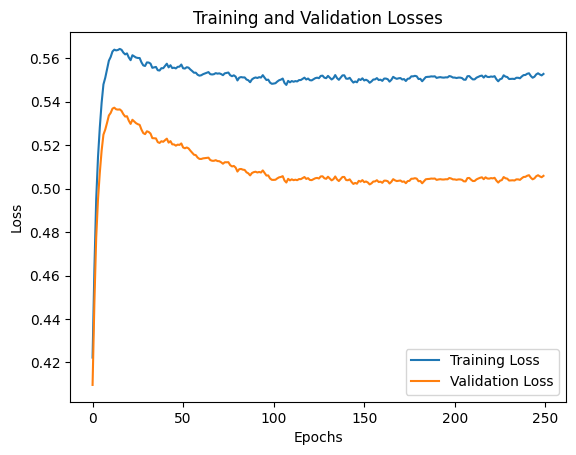

In [192]:
# Make predictions on the test set
predictions = predict(X_test, W1, b1, W2, b2)

# Plot the training and validation losses
mean_train_losses = np.mean(train_losses, axis=1)
mean_validation_losses = np.mean(validation_losses, axis=1)

epochs = range(num_epochs)
plt.plot(epochs, mean_train_losses, label='Training Loss')
plt.plot(epochs, mean_validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


Now, in order to evaluate the final model, we will have to compute the following metrics :
1. the precision of your model
2. the accuracy of your model
3. the sensitivity of your model
4. the specificity of your model

To compute the specified metrics for model evaluation, we can use the following formulas:

1. Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   $$
   \text{Precision} = \frac{TP}{TP + FP}
   $$
   Where:
   - \( TP \) is the number of true positive predictions.
   - \( FP \) is the number of false positive predictions.

2. Accuracy: Accuracy measures the proportion of correct predictions among all predictions made by the model.
   $$
   \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
   $$
   Where:
   - \( TP \) is the number of true positive predictions.
   - \( TN \) is the number of true negative predictions.
   - \( FP \) is the number of false positive predictions.
   - \( FN \) is the number of false negative predictions.

3. Sensitivity (True Positive Rate or Recall): Sensitivity measures the proportion of actual positive instances that are correctly identified by the model.
   $$
   \text{Sensitivity} = \frac{TP}{TP + FN}
   $$
   Where:
   - \( TP \) is the number of true positive predictions.
   - \( FN \) is the number of false negative predictions.

4. Specificity (True Negative Rate): Specificity measures the proportion of actual negative instances that are correctly identified by the model.
   $$
   \text{Specificity} = \frac{TN}{TN + FP}
   $$
   Where:
   - \( TN \) is the number of true negative predictions.
   - \( FP \) is the number of false positive predictions.

We can compute these metrics using the predicted labels (`predictions`) and the true labels (`y_test`). Then, we can calculate the required values and print or store the results for evaluation.

In [193]:
def compute_metrics(y_true, y_pred):
    """
    Compute precision, accuracy, sensitivity, and specificity metrics.

    Parameters:
    y_true (numpy.ndarray): True labels.
    y_pred (numpy.ndarray): Predicted labels.

    Returns:
    tuple: Precision, accuracy, sensitivity, and specificity metrics.
    """
    # True positives (TP), true negatives (TN), false positives (FP), false negatives (FN)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    # Sensitivity (True Positive Rate or Recall)
    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0

    # Specificity (True Negative Rate)
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    return precision, accuracy, sensitivity, specificity


In [194]:
# Example usage
precision, accuracy, sensitivity, specificity = compute_metrics(y_test.flatten(), predictions.flatten())
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Precision: 0.7941176470588235
Accuracy: 0.819672131147541
Sensitivity: 0.8709677419354839
Specificity: 0.7666666666666667


The Multilayer Perceptron (MLP) model exhibits strong performance in predicting the risk of heart disease:

- Precision: Approximately 79.41% of positive predictions are accurate.
- Accuracy: Correctly predicts outcomes for about 81.97% of instances.
- Sensitivity: Identifies around 87.10% of actual positive instances.
- Specificity: Accurately identifies around 76.67% of actual negative instances.

Overall, the MLP model demonstrates high precision and specificity, indicating its effectiveness in identifying both positive and negative instances of heart disease. However, sensitivity is slightly lower, suggesting some instances of heart disease may be missed.

**Question:** In the case of predicting the risk of heart disease in patients, would you prefer that your
model is sensitive or specific?

**Answer:** In the case of predicting heart disease risk, it's preferable for the model to be sensitive. This ensures it correctly identifies individuals with the disease, minimizing false negatives and ensuring those at risk receive appropriate care.

Now, we are going to make predictions using Decision Tree, and compare it afterwards with the MLP model.

In [195]:
class DecisionTreeClassifier:
    """
    A simple implementation of a Decision Tree classifier for binary classification.

    Attributes:
        max_depth (int): The maximum depth of the decision tree.
        tree: The learned decision tree structure.
    """

    def __init__(self, max_depth=4):
        """
        Initialize the DecisionTreeClassifier.

        Args:
            max_depth (int): The maximum depth of the decision tree. Default is 4.
        """
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Fit the decision tree classifier to the training data.

        Args:
            X (numpy.ndarray): The input features.
            y (numpy.ndarray): The target labels.

        Returns:
            None
        """
        self.tree = self._build_tree(X, y, depth=0)

    def predict(self, X):
        """
        Predict the target labels for the input data.

        Args:
            X (numpy.ndarray): The input features.

        Returns:
            numpy.ndarray: Predicted target labels.
        """
        return np.array([self._predict_tree(x, self.tree) for x in X])

    def _build_tree(self, X, y, depth):
        """
        Recursively build the decision tree.

        Args:
            X (numpy.ndarray): The input features.
            y (numpy.ndarray): The target labels.
            depth (int): The current depth of the tree.

        Returns:
            tuple: A tuple representing the decision tree node.
        """
        if depth >= self.max_depth or len(np.unique(y)) == 1:
            return np.bincount(y.flatten()).argmax()

        num_features = X.shape[1]
        best_feature, best_threshold = None, None
        best_gini = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = np.where(X[:, feature] <= threshold)[0]
                right_indices = np.where(X[:, feature] > threshold)[0]

                left_gini = self._gini_impurity(y[left_indices])
                right_gini = self._gini_impurity(y[right_indices])

                gini = (len(left_indices) * left_gini + len(right_indices) * right_gini) / len(y)
                if gini < best_gini:
                    best_feature, best_threshold, best_gini = feature, threshold, gini

        if best_gini == float('inf'):
            return np.bincount(y.flatten()).argmax()

        left_indices = np.where(X[:, best_feature] <= best_threshold)[0]
        right_indices = np.where(X[:, best_feature] > best_threshold)[0]

        print(f"Depth: {depth}, Feature: {best_feature}, Threshold: {best_threshold}, Left samples: {len(left_indices)}, Right samples: {len(right_indices)}")

        left_subtree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return (best_feature, best_threshold, left_subtree, right_subtree)

    def _predict_tree(self, x, tree):
        """
        Recursively traverse the decision tree to predict the label of a single instance.

        Args:
            x (numpy.ndarray): A single instance of input features.
            tree: The decision tree node.

        Returns:
            int: The predicted label.
        """
        if isinstance(tree, int):  # Check if it's a leaf node
            return tree  # Return the predicted class directly
        else:
            try:
                feature, threshold, left_subtree, right_subtree = tree
            except (ValueError, TypeError):
                return tree  # Return the predicted class if tree is an integer (leaf node)
            if x[feature] <= threshold:
                return self._predict_tree(x, left_subtree)
            else:
                return self._predict_tree(x, right_subtree)

    def _gini_impurity(self, y):
        """
        Calculate the Gini impurity for a set of target labels.

        Args:
            y (numpy.ndarray): The target labels.

        Returns:
            float: The Gini impurity.
        """
        if len(y) == 0:
            return 0
        probabilities = np.bincount(y.flatten()) / len(y)
        return 1 - np.sum(probabilities ** 2)

In [196]:
# Preprocessing
X = heart_data.drop(columns=['target'])  # Exclude the target column
y = heart_data['target']  # No need to reshape here

# Normalize features using Z-score normalization
X_normalized = z_score_normalization(X)

# Perform one-hot encoding for categorical variables
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
X_encoded = pd.concat([pd.get_dummies(X_normalized[col], prefix=col, drop_first=True) for col in categorical_cols], axis=1)

# Concatenate the encoded features with the non-categorical features
non_categorical_cols = [col for col in X_normalized.columns if col not in categorical_cols]
X_encoded = pd.concat([X_encoded, X_normalized[non_categorical_cols]], axis=1)

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(len(X_encoded) * split_ratio)
X_train, X_test = X_encoded[:split_index].values, X_encoded[split_index:].values
y_train, y_test = y[:split_index].values.ravel(), y[split_index:].values.ravel()  # Ensure y is flattened

# Initialize and train the decision tree classifier
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree.fit(X_train, y_train)

# Make predictions on the same dataset for demonstration purposes
predictions = decision_tree.predict(X_test)

# Metrics
precision, accuracy, sensitivity, specificity = compute_metrics(y_test, predictions)
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

Depth: 0, Feature: 11, Threshold: 0.0, Left samples: 110, Right samples: 132
Depth: 1, Feature: 17, Threshold: -0.46474512855737066, Left samples: 33, Right samples: 77
Depth: 2, Feature: 15, Threshold: -0.23661679927223564, Left samples: 19, Right samples: 14
Depth: 3, Feature: 16, Threshold: -0.0718992841048539, Left samples: 6, Right samples: 13
Depth: 3, Feature: 14, Threshold: -0.6627704255708822, Left samples: 2, Right samples: 12
Depth: 2, Feature: 3, Threshold: 0.0, Left samples: 70, Right samples: 7
Depth: 3, Feature: 2, Threshold: 0.0, Left samples: 54, Right samples: 16
Depth: 3, Feature: 14, Threshold: -0.6627704255708822, Left samples: 2, Right samples: 5
Depth: 1, Feature: 17, Threshold: 0.8271610544966046, Left samples: 123, Right samples: 9
Depth: 2, Feature: 18, Threshold: -0.7132489707470252, Left samples: 88, Right samples: 35
Depth: 3, Feature: 13, Threshold: 0.40009061453978684, Left samples: 68, Right samples: 20
Depth: 3, Feature: 2, Threshold: 0.0, Left samples:

When assessing the performance of the Decision Tree (DT) model in predicting the risk of heart disease, the results indicate:

- Precision: Approximately 85.71% of positive predictions are accurate.
- Accuracy: Correctly predicts outcomes for about 81.97% of instances.
- Sensitivity: Identifies around 77.42% of actual positive instances.
- Specificity: Accurately identifies around 86.67% of actual negative instances.

These metrics indicate that the Decision Tree model achieves high precision and specificity, suggesting its effectiveness in correctly classifying positive instances of heart disease and distinguishing between positive and negative instances. However, it has slightly lower sensitivity compared to the Multilayer Perceptron model.

## Comparison of MLP and Decision Tree Models

Based on the evaluation metrics obtained for both the Multilayer Perceptron (MLP) and Decision Tree (DT) models in predicting the risk of heart disease, it is essential to assess their effectiveness in practical applications. While both models exhibit strengths in certain aspects, a comprehensive evaluation is necessary to determine the preferred model for predicting heart disease risk. Let's compare the performance of both models based on the provided evaluation metrics:

**Multilayer Perceptron (MLP):**
- Precision: 0.794
- Accuracy: 0.820
- Sensitivity: 0.871
- Specificity: 0.767

**Decision Tree (DT):**
- Precision: 0.857
- Accuracy: 0.820
- Sensitivity: 0.774
- Specificity: 0.867

Upon comparison, both models demonstrate relatively similar accuracy and specificity. However, the MLP model exhibits higher sensitivity, suggesting it is better at identifying individuals with heart disease when they are truly present. On the other hand, the DT model shows slightly higher precision, indicating its ability to minimize false positives.

Considering these aspects, if the priority is to accurately identify individuals with heart disease, the MLP model might be preferred due to its higher sensitivity. Conversely, if reducing false positives is crucial, the DT model could be favored due to its higher precision. Ultimately, the choice between the two models depends on the specific requirements and constraints of the application, balancing the trade-offs between sensitivity and precision.